In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
doc = pd.read_csv ("/content/drive/MyDrive/datasetDATMIN/calcofi8atri.csv")
doc

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
0,14.260,33.3960,683768,1,6.050,103.80,263.6302,1.0
1,14.290,33.3960,683769,6,6.060,104.00,264.0675,2.0
2,14.300,33.4010,683771,12,6.060,104.00,264.0670,3.0
3,14.320,33.4060,683773,22,6.030,103.50,262.7597,4.0
4,14.230,33.4110,683775,31,5.990,102.70,261.0108,5.0
...,...,...,...,...,...,...,...,...
114929,5.818,34.2382,864858,521,0.366,5.23,15.9500,1.0
114930,18.744,33.4083,864860,2,5.805,108.74,253.4700,4.0
114931,18.692,33.4150,864861,5,5.796,108.46,253.0600,3.0
114932,18.161,33.4062,864862,10,5.816,107.74,253.9200,2.0


<Axes: >

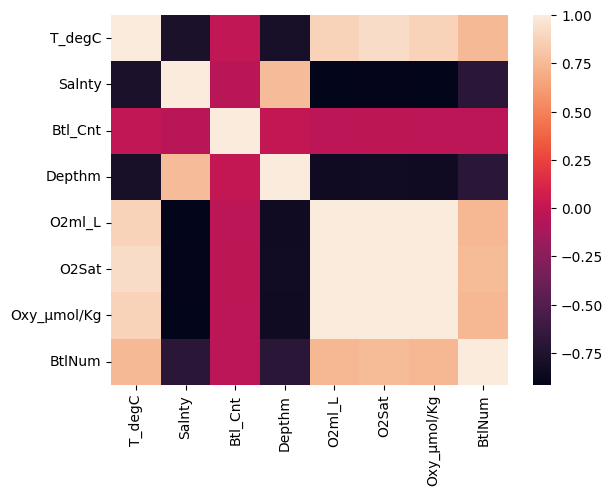

In [42]:
#Korelasi Heatmap dari 8 atribut
sns.heatmap (doc.corr())

Mean Squared Error: 14.363524882332388


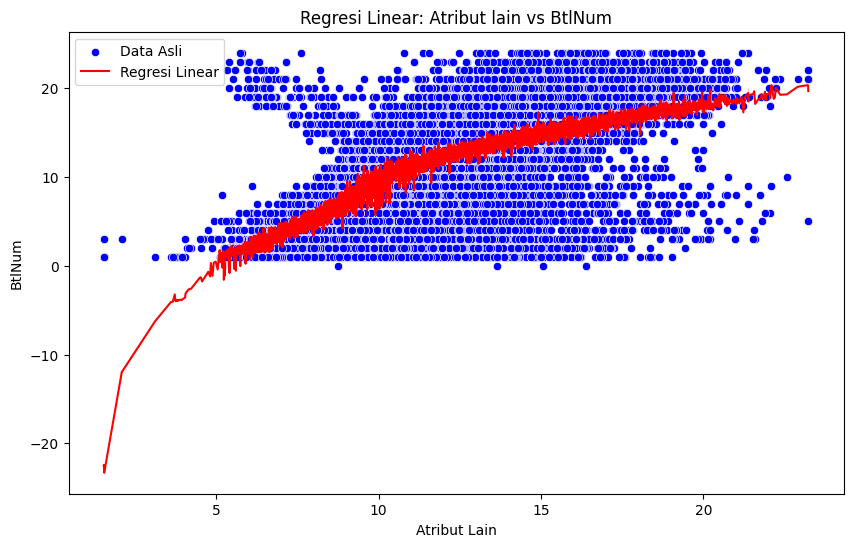

In [43]:
#Regresi yang menjadikan BtlNum sebagai target yang ingin diprediksi
X = doc.drop(columns=['BtlNum'])
y = doc['BtlNum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regresi = LinearRegression()
regresi.fit(X_train, y_train)

y_pred = regresi.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['T_degC'], y=y_test, color='blue', label='Data Asli')
sns.lineplot(x=X_test['T_degC'], y=y_pred, color='red', label='Regresi Linear')
plt.xlabel("Atribut Lain")
plt.ylabel("BtlNum")
plt.title("Regresi Linear: Atribut lain vs BtlNum")
plt.legend()
plt.show()


Polynomial Regression Model R-squared Score: 63.56%


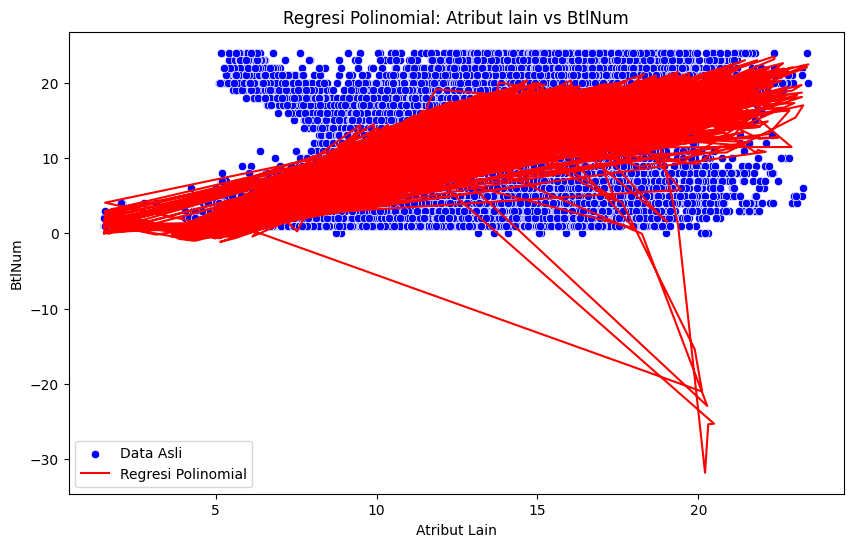

In [53]:
# Konversi ke fitur polinomial (misalnya, pangkat 2)
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat 2, dapat disesuaikan
X_poly = poly.fit_transform(X)

# Inisialisasi dan latih model regresi polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Prediksi menggunakan fitur polinomial
y_pred = model.predict(X_poly)

# Hitung R-squared
r2 = r2_score(y, y_pred)
print("Polynomial Regression Model R-squared Score: {:.2f}%".format(r2 * 100))

# Visualisasi hasil regresi polinomial
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['T_degC'], y=y, color='blue', label='Data Asli')
plt.plot(X['T_degC'], y_pred, color='red', label='Regresi Polinomial')
plt.xlabel("Atribut Lain")
plt.ylabel("BtlNum")
plt.title("Regresi Polinomial: Atribut lain vs BtlNum")
plt.legend()
plt.show()

In [65]:
# Initialize and train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Make predictions on the training data
dt_predict = dt_reg.predict(X_train)

# Display the mean of predictions as a percentage
print("Mean Prediction (%): {:.2f}%".format(dt_predict.mean() * 100))

Mean Prediction (%): 1030.70%


In [47]:
#Slope
regresi.coef_[0]

0.7092910029998325

In [48]:
#Intercept
regresi.intercept_

106.65114839571147

In [49]:
#Prediksi Nilai Y memakai Slope dan Intercept
y_pred = regresi.predict(X_test)
print (y_pred)

#Prediksi nilai MAPE
mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test == 0, 1, y_test))) * 100
print("Mean Absolute Percentage Error: {:.2f}%".format(mape))

[ 5.98220652 13.92070343 11.96396708 ...  4.20478907 10.03143842
  8.05641625]
Mean Absolute Percentage Error: 49.95%


In [50]:
#Skor R2 atau prediksi nilai ke-akuratan
print("R² Score: {:.2f}%".format(r2_score(y_test, y_pred) * 100))


R² Score: 61.24%
